In [1165]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import os

In [1166]:
# Load the data
df=None
if os.path.exists("bank-additional-full.csv"):
    print("Loading dataset from the local storage...")
    df=pd.read_csv("bank-additional-full.csv", sep=";")
else:
    print("Dataset unavailable! Loading from the Internet...")
    df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv',sep=";")
    print("Saving dataset in the local storage")
    df.to_csv("bank-additional-full.csv", sep=";", index=False)
    print("Saved")

Loading dataset from the local storage...


In [1167]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [1168]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1169]:
categoric_cols=["job","marital","education","contact","month","day_of_week","poutcome","default","housing","loan","y"]

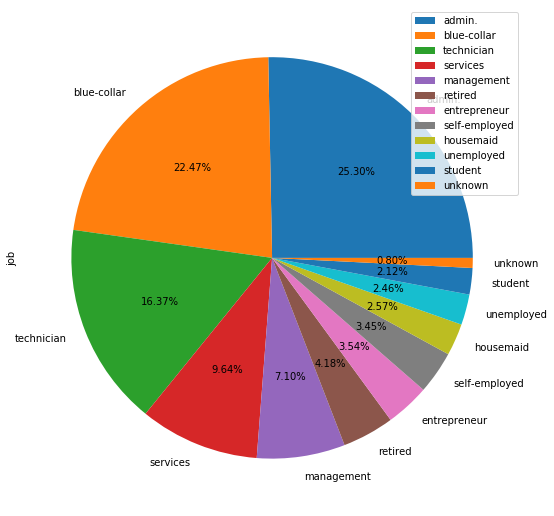

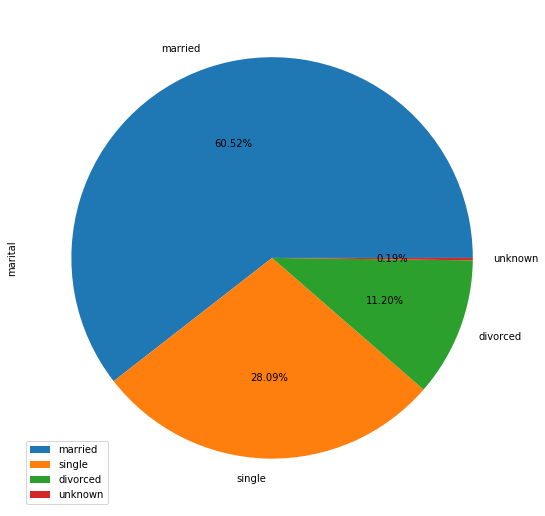

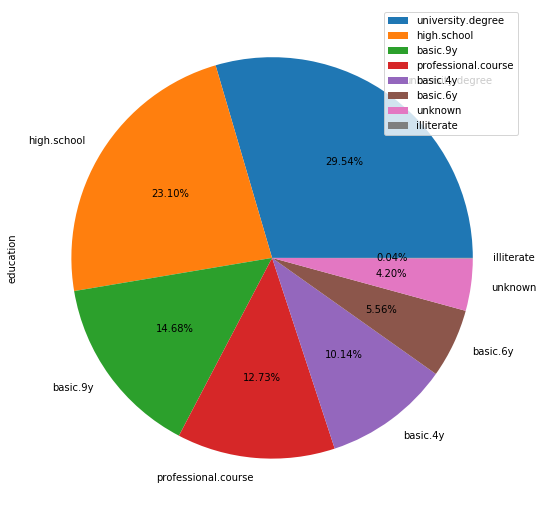

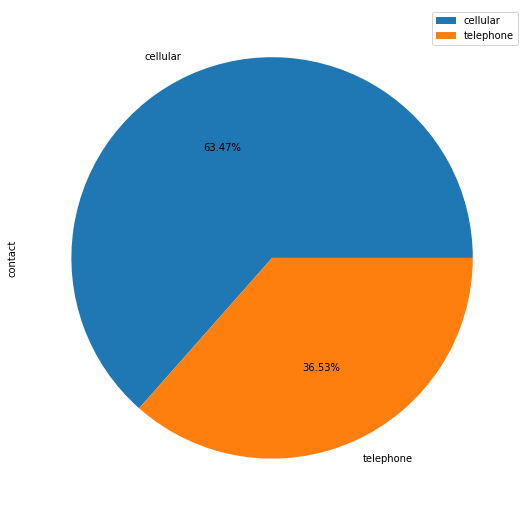

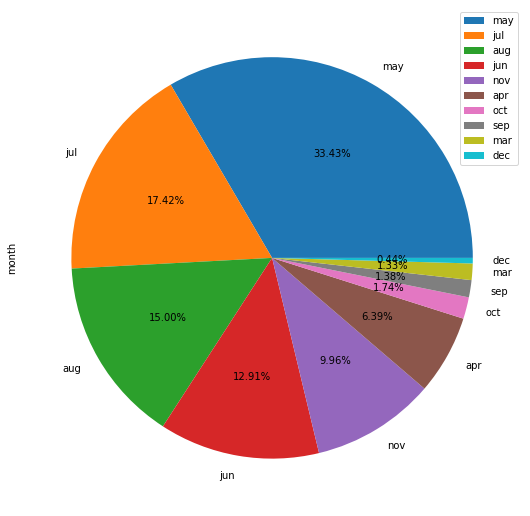

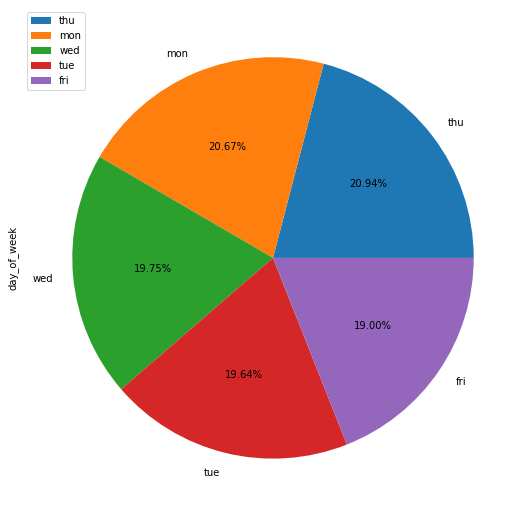

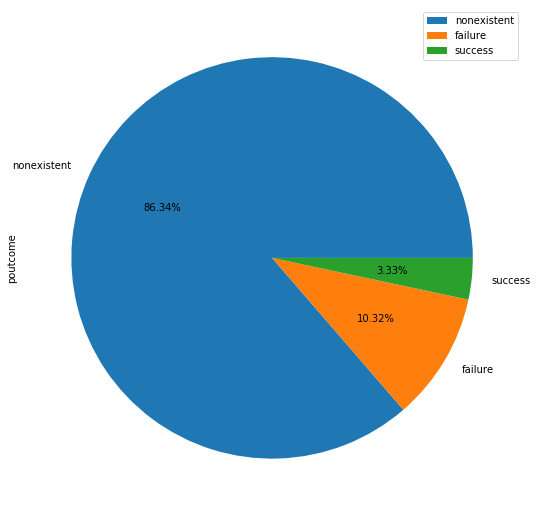

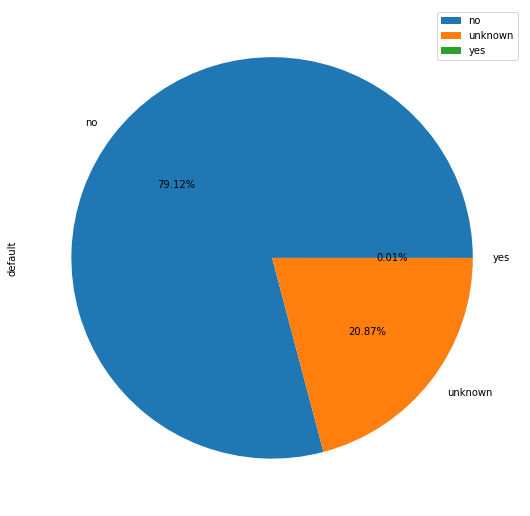

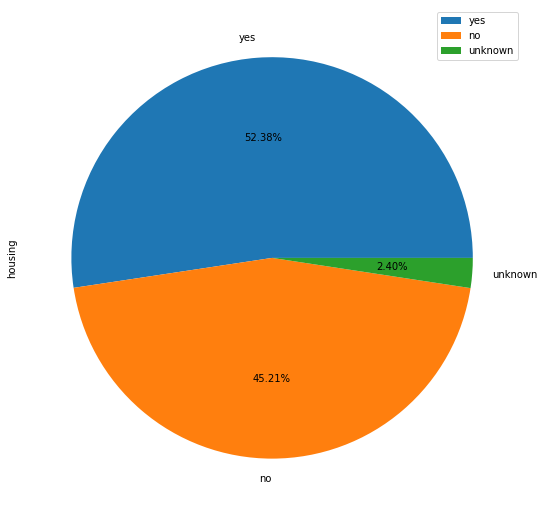

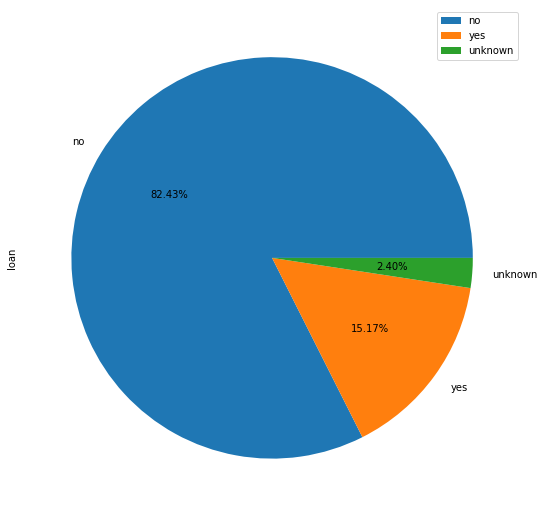

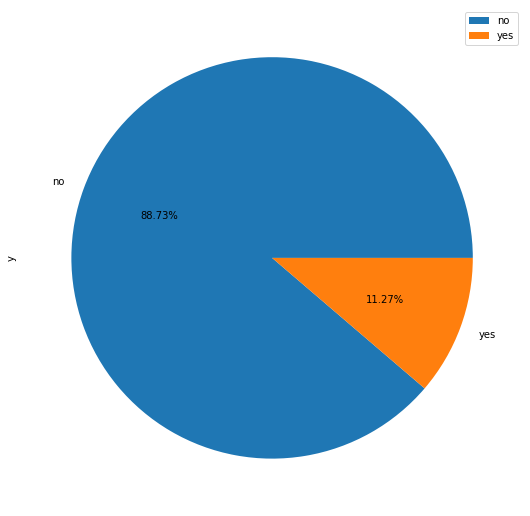

In [1170]:
for col in categoric_cols:
  df[[col]].apply(pd.value_counts).plot(kind="pie",figsize=(25,120),layout=(11,1),subplots=True, autopct='%1.2f%%')

In [1171]:
# df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)
# df[["marital"]] = df[["marital"]].apply(LabelEncoder().fit_transform)
# df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
# df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
# df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
# df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
# df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)




In [1172]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [1173]:
# df=df.replace(to_replace='unknown',value=np.nan)

In [1174]:
df.isna().sum(axis=1).clip(upper=1).sum()

0

In [1175]:

df=df.dropna()

In [1176]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [1177]:
df=df.drop(columns="duration")

In [1178]:
df_1=pd.get_dummies(df.drop(columns="y"))
df_1["y"]=df["y"]
df=df_1

In [1179]:
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,1,0,1


In [1180]:
# all_other_cols=np.intersect1d(categoric_cols,df.columns, assume_unique=True)
# all_other_cols=all_other_cols.tolist().remove("y")
all_other_cols=np.intersect1d(categoric_cols,df.columns, assume_unique=True)

In [1181]:
all_other_cols

array(['y'], dtype=object)

In [1182]:
all_other_cols=all_other_cols.tolist()

In [1183]:
all_other_cols

['y']

In [1184]:
all_other_cols.remove("y")

In [1185]:
all_other_cols

[]

In [1186]:
for item in all_other_cols:
  df[[item]].plot.hist(title =item)

In [1187]:
X=df.drop(columns="y")
Y=df["y"]

In [1188]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1189]:
share=df["y"].value_counts()[1]/df["y"].value_counts()[0]

In [1190]:
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [1191]:
# oversample = SMOTE()
# X, Y = oversample.fit_resample(X, Y)
# undersample = RandomUnderSampler(sampling_strategy="majority")
# X, Y = undersample.fit_resample(X, Y)

In [1192]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=50, stratify=Y)

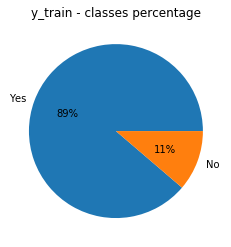

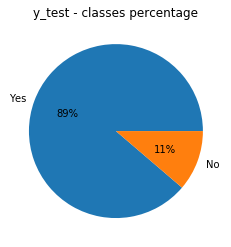

In [1193]:
plt.pie(np.unique(y_train, return_counts=True)[1],labels={"Yes":1, "No":0},autopct='%1.0f%%')
plt.title(label="y_train - classes percentage")
plt.show()
plt.pie(np.unique(y_test, return_counts=True)[1],labels={"Yes":1, "No":0}, autopct='%1.0f%%')
plt.title(label="y_test - classes percentage")
plt.show()



In [1194]:
dummy_clf = DummyClassifier(strategy='stratified')
forest_clf = RandomForestClassifier(n_estimators=1000,max_depth=10, random_state=60)

In [1195]:
print(round(np.mean(cross_val_score(dummy_clf,X_train,y_train,cv=10,n_jobs=-1, verbose=1, scoring="f1")),2))
val_f1_score = np.mean(cross_val_score(forest_clf,X_train,y_train,cv=10,n_jobs=-1, verbose=1, scoring="f1"))
round(val_f1_score,2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.11


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


0.33

In [1196]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=60)

In [1197]:
y_predict=forest_clf.predict(X_test)

In [1198]:
test_f1_score=f1_score(y_predict,y_test)

In [1199]:
round(test_f1_score,2)

0.36

In [1200]:
dummy_clf.fit(X_train,y_train)

DummyClassifier(strategy='stratified')

In [1201]:
round(f1_score(dummy_clf.predict(X_test), y_test),2)

0.11

In [1202]:
features=df.drop(["y"],axis=1).columns

[ 8  7  2 61  4  6  5  0  3  1 60 59 52 49 42 50 43 55 44 31 56 54 38 57
 36 10 23 48 22 58 14 28 33 17 34 53  9 39 18 30 41 27 21 25 32 45 16 13
 51 47 15 26 19 46 12 40 37 20 11 24 29 35]
Feature ranking:
1. nr.employed (0.146933)
2. euribor3m (0.142862)
3. pdays (0.093918)
4. poutcome_success (0.074663)
5. emp.var.rate (0.066610)
6. cons.conf.idx (0.065194)
7. cons.price.idx (0.053372)
8. age (0.044744)
9. previous (0.025034)
10. campaign (0.017224)
11. poutcome_nonexistent (0.016363)
12. poutcome_failure (0.015769)
13. month_oct (0.014927)
14. month_mar (0.014474)
15. contact_cellular (0.013814)
16. month_may (0.013082)
17. contact_telephone (0.012080)
18. day_of_week_mon (0.008207)
19. month_apr (0.007968)
20. education_university.degree (0.006273)
21. day_of_week_thu (0.005442)
22. day_of_week_fri (0.005422)
23. housing_yes (0.005376)
24. day_of_week_tue (0.005311)
25. housing_no (0.005295)
26. job_blue-collar (0.005134)
27. marital_single (0.005124)
28. month_jun (0.005032)
29. 

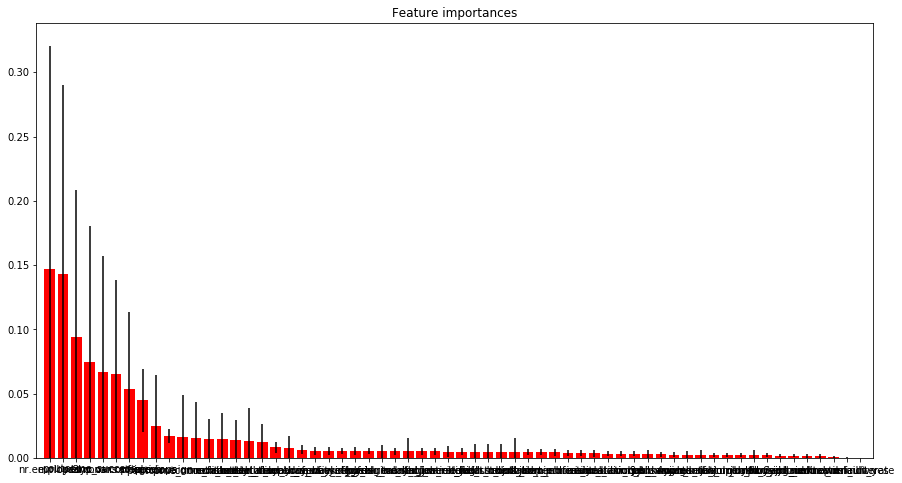

In [1203]:
importances = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [ ]:
params_forest={"n_estimators":[10,100],"max_depth":[30,35,40,45],"min_samples_split":[2, 5, 10],"min_samples_leaf":[1, 2, 5, 10]}

In [ ]:
grid_forest=GridSearchCV(forest_clf,param_grid=params_forest,scoring="accuracy",n_jobs=-1,return_train_score=True,verbose=1,refit=True, cv=kfold)

In [ ]:
grid_forest

In [ ]:
grid_forest.fit(X_train,y_train)
# forest_clf.fit(X_train,y_test)

In [ ]:
forest_clf=grid_forest.best_estimator_
print(grid_forest.best_params_)

In [ ]:
grid_forest.best_score_

In [ ]:
# TODO: gridsearhccv -add right params
# SMOTE try to add

In [ ]:
dummy_clf.fit(X_train, y_train)
y_predict=dummy_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score as acc

In [ ]:
acc(y_predict,y_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_predict,y_test)

In [ ]:
y_predict=forest_clf.predict(X_test)

In [ ]:
test_acc= acc(y_predict,y_test)

In [ ]:
f1_score(y_predict,y_test)

In [ ]:
len(df)

In [ ]:
generalisation_error= grid_forest.best_score_-test_acc

In [ ]:
generalisation_error

In [ ]:
# "Validation curve"